In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sn
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions 
import pandas as pd
import numpy as np
import os
import glob

### *functions*

In [1]:
def get_label_from_filename(filename): 
    if "Phantom" in filename: return "Phantom"
    elif "Ruko_F11_Pro" in filename: return "Ruko_F11_Pro"
    elif "Mavic_Air_2_" in filename: return "Mavic_Air_2"
    elif "Mavic_Air_2S" in filename: return "Mavic_Air_2S"
    elif "DeerC" in filename: return "DeerC"
    elif "Mini_SE" in filename: return "Mini_SE"
    elif "test" in filename: return "test"
    elif "None" in filename: return "None"
    else: return "unknown_label"
    
def load_iq(file, window_size, samples_per_file): 
    df = pd.read_csv(file, nrows=window_size * samples_per_file)
    iq = df[['i', 'q']].to_numpy()
    return iq
    

### *variables*

In [4]:
# Path to your IQ files
data_dir = "./data/"
drone_csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
print(drone_csv_files)

# Example: 2048-sample windows with 50% overlap
window_size = 2048 # number of iq samples per chunk (=2 would be 1 sample, i,q)
samples_per_file = 3
step = 1024

['./data/1970-01-01-00-05-14_None-5GHz_5800MHz_chan_0.csv', './data/2025-07-23-21-18-31_Ruko_F11_Pro_Video_5805MHz_chan_0.csv', './data/2025-07-18-22-21-33_test_5735MHz_chan_0.csv', './data/2025-07-23-21-27-37_DeerC_DE2_2455MHz_chan_0.csv', './data/2025-07-23-21-18-45_Ruko_F11_Pro_Video_5805MHz_chan_0.csv', './data/1970-01-01-00-04-35_None-2.4GHz_2400MHz_chan_0.csv', './data/2025-07-23-21-13-39_Ruko_F11_Pro_2460MHz_chan_0.csv', './data/2025-07-18-22-57-17_Mavic_Air_2_5735MHz_chan_0.csv', './data/2025-07-22-19-21-26_Mini_SE_5805MHz_chan_0.csv', './data/2025-07-23-21-13-29_Ruko_F11_Pro_2460MHz_chan_0.csv', './data/2025-07-22-19-21-38_Mini_SE_5805MHz_chan_0.csv', './data/2025-07-18-23-03-13_Mavic_Air_2S_5735MHz_chan_0.csv', './data/2025-07-23-21-28-22_DeerC_DE2_2450MHz_chan_0.csv', './data/1970-01-01-00-04-18_None-2.4GHz_2400MHz_chan_0.csv', './data/1970-01-01-00-05-01_None-5GHz_5800MHz_chan_0.csv', './data/2025-07-23-21-28-13_DeerC_DE2_2450MHz_chan_0.csv', './data/2025-07-23-21-13-50_Ruk

In [5]:
X = []
y = []

segments = []
labels = []


for file in drone_csv_files:
    print("File: ", file)
    label = get_label_from_filename(file)
    # print("Label: ", label)
    iq = load_iq(file, window_size, samples_per_file)  # shape (N, 2)
    print("File:\n", iq)
    for i in range(0, len(iq)-window_size, step):
        window = iq[i:i+window_size].flatten()
        segments.append(window)
        labels.append(label)
    # print("Segments:\n", segments)
    # print("Labels:\n", labels)


X = [segment.flatten() for segment in segments]
y = labels

# print("X feature:\n", X)
# print("y feature:\n", y)

X = np.array(X)
y = np.array(y)
print(X)
print(y)

File:  ./data/1970-01-01-00-05-14_None-5GHz_5800MHz_chan_0.csv
File:
 [[-7123.  4273.]
 [-2849. -1424.]
 [    0. -1424.]
 ...
 [-2849. -8547.]
 [ 8547.  2849.]
 [ 5698.  1424.]]
File:  ./data/2025-07-23-21-18-31_Ruko_F11_Pro_Video_5805MHz_chan_0.csv
File:
 [[  0. -61.]
 [ 10. -50.]
 [-10. -10.]
 ...
 [-30.  10.]
 [  0. -61.]
 [-20.  61.]]
File:  ./data/2025-07-18-22-21-33_test_5735MHz_chan_0.csv
File:
 [[ -30.  -61.]
 [-246.  123.]
 [-123.    0.]
 ...
 [-184.  -30.]
 [-215.  -92.]
 [ -92.  153.]]
File:  ./data/2025-07-23-21-27-37_DeerC_DE2_2455MHz_chan_0.csv
File:
 [[-275.  120.]
 [-137.  -17.]
 [-206. -189.]
 ...
 [ 223.  240.]
 [ 309. -120.]
 [  85.  154.]]
File:  ./data/2025-07-23-21-18-45_Ruko_F11_Pro_Video_5805MHz_chan_0.csv
File:
 [[ 20.  -6.]
 [-20.   6.]
 [ 26. -26.]
 ...
 [  6.  13.]
 [ 13.   0.]
 [ 13. -26.]]
File:  ./data/1970-01-01-00-04-35_None-2.4GHz_2400MHz_chan_0.csv
File:
 [[-1129. -4519.]
 [    0.  2259.]
 [ 6779.     0.]
 ...
 [-6779.  1129.]
 [ 5649.  1129.]
 [-4519

In [ ]:
print("labels: ")
print(np.unique(y))
print()

for sample, label in zip(X, np.unique(y)): 
    print("X feature:\n", sample)
    print("IQ samples in X feature: ", int(sample.size / 2))
    print("y label: ", label)
    print('-------------------------------------------')

## Support Vector Classifier 

### *Training & fitting*

In [ ]:
# Train/test split (e.g. 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
SVCModel = SVC(kernel='rbf', C=10, gamma='scale', max_iter=10_000)  # tweak C/gamma as needed
SVCModel.fit(X_train, y_train)

### *Prediction & metrics*

In [ ]:

y_pred = SVCModel.predict(X_test)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cr)
print(cm)

In [ ]:
# Create a heatmap of the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(7, 7))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap for SVC Predictions')

# Show the plot
plt.show()


[[   8    0    0    0   25  686    0]
 [   0    0    0    1  176   62    1]
 [   0    0   14   45    0  181    0]
 [   0    0   20  134   79  225   21]
 [   0    0    0    1  871    0   86]
 [   0    0    0    5   38 1151    4]
 [   0    0    1    0  372  101    5]]


ValueError: y must be an integer array. Found <U12. Try passing the array as y.astype(np.int_)

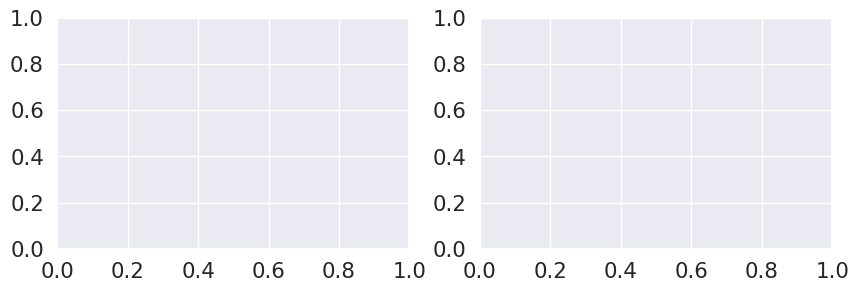

In [49]:
# Display the decision boundary with training data
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

fig = plot_decision_regions(X_train, np.ravel(y_train), SVCModel, ax = ax[0], zoom_factor=0.5)
ax[0].set_xlabel('In-Phase (I)', fontsize = 14)
ax[0].set_ylabel('Quadrature Phase (Q)', fontsize = 14)
ax[0].set_title('SVC (train)', fontsize = 14)
ax[0].set_xlim(-2.5, 10.5)
ax[0].set_ylim(-2.5, 2.5)

# Display the decision boundary with testing data
fig = plot_decision_regions(X_test, np.ravel(y_test), SVCModel, ax = ax[1], zoom_factor=0.25)
ax[1].set_xlabel('In-Phase (I)', fontsize = 14)
ax[1].set_title('SVC (test)', fontsize = 14)
ax[1].set_xlim(-2.5, 10.5)
ax[1].set_ylim(-2.5, 2.5)

plt.show()

## Random Forest Classifier